<a href="https://colab.research.google.com/github/NunnapatSamakka/AliceWork/blob/main/CE101Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CE101 Team Project/cleaned_heart_data.csv")
df.head()

,Unnamed: 0,age,sex,Chest Pain Type,Resting Blood Pressure (mm/Hg),Serum Cholrestoral (mg/dl),Fasting blood sugar,Resting ECG,MAX Heartrate,Exercice Induced Angina,oldpeak,slope,number of major vessels,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
g = df.groupby('sex')
print(g)

In [ ]:
for sex, sex_df in g:
  print(sex)
  print(sex_df)

0
     Unnamed: 0  age  sex  Chest Pain Type  Resting Blood Pressure (mm/Hg)  \
2             2   41    0                1                             130   
4             4   57    0                0                             120   
6             6   56    0                1                             140   
11           11   48    0                2                             130   
14           14   58    0                3                             150   
..          ...  ...  ...              ...                             ...   
289         289   55    0                0                             128   
292         292   58    0                0                             170   
296         296   63    0                0                             124   
298         298   57    0                0                             140   
302         302   57    0                1                             130   

     Serum Cholrestoral (mg/dl)  Fasting blood sugar  Resting

In [ ]:
g.max()

,Unnamed: 0,age,Chest Pain Type,Resting Blood Pressure (mm/Hg),Serum Cholrestoral (mg/dl),Fasting blood sugar,Resting ECG,MAX Heartrate,Exercice Induced Angina,oldpeak,slope,number of major vessels,thal,target
sex,,,,,,,,,,,,,,
0,302,76,3,200,564,1,2,192,1,6.2,2,3,3,1
1,301,77,3,192,353,1,2,202,1,5.6,2,4,3,1


In [ ]:
g.describe()

Unnamed: 0                                                            age  \
         count        mean        std  min    25%    50%    75%    max  count   
sex                                                                             
0         96.0  125.166667  80.572513  2.0  59.75  119.5  162.5  302.0   96.0   
1        207.0  162.980676  88.340689  0.0  82.00  176.0  237.5  301.0  207.0   

                ... thal      target                                           \
          mean  ...  75%  max  count      mean       std  min   25%  50%  75%   
sex             ...                                                             
0    55.677083  ...  2.0  3.0   96.0  0.750000  0.435286  0.0  0.75  1.0  1.0   
1    53.758454  ...  3.0  3.0  207.0  0.449275  0.498626  0.0  0.00  0.0  1.0   

          
     max  
sex       
0    1.0  
1    1.0  

[2 rows x 112 columns]

In [ ]:
g = df.groupby('target')
print(g)

In [ ]:
for target, target_df in g:
  print(target)
  print(target_df)

0
     Unnamed: 0  age  sex  Chest Pain Type  Resting Blood Pressure (mm/Hg)  \
165         165   67    1                0                             160   
166         166   67    1                0                             120   
167         167   62    0                0                             140   
168         168   63    1                0                             130   
169         169   53    1                0                             140   
..          ...  ...  ...              ...                             ...   
298         298   57    0                0                             140   
299         299   45    1                3                             110   
300         300   68    1                0                             144   
301         301   57    1                0                             130   
302         302   57    0                1                             130   

     Serum Cholrestoral (mg/dl)  Fasting blood sugar  Resting

In [ ]:
df.mean()

,0
Unnamed: 0,151.000000
age,54.366337
sex,0.683168
Chest Pain Type,0.966997
Resting Blood Pressure (mm/Hg),131.623762
Serum Cholrestoral (mg/dl),246.264026
Fasting blood sugar,0.148515
Resting ECG,0.528053
MAX Heartrate,149.646865
Exercice Induced Angina,0.326733


In [ ]:
age_with_vessels = df[['age', 'number of major vessels']].corr()
display(age_with_vessels)

,age,number of major vessels
age,1.000000,0.276326
number of major vessels,0.276326,1.000000


In [ ]:
df[['age', 'Serum Cholrestoral (mg/dl)']].corr()

,age,Serum Cholrestoral (mg/dl)
age,1.000000,0.213678
Serum Cholrestoral (mg/dl),0.213678,1.000000


In [ ]:
df.groupby('sex')['target'].mean()

,target
sex,
0,0.750000
1,0.449275


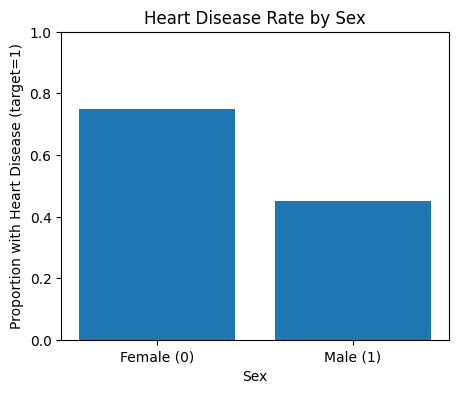

In [ ]:
rate_by_sex = df.groupby('sex')['target'].mean()

plt.figure(figsize=(5,4))
plt.bar(['Female (0)', 'Male (1)'], rate_by_sex.values)
plt.title('Heart Disease Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion with Heart Disease (target=1)')
plt.ylim(0, 1)
plt.show()

In [ ]:
df.groupby('number of major vessels')['target'].mean()

,target
number of major vessels,
0,0.742857
1,0.323077
2,0.184211
3,0.150000
4,0.800000


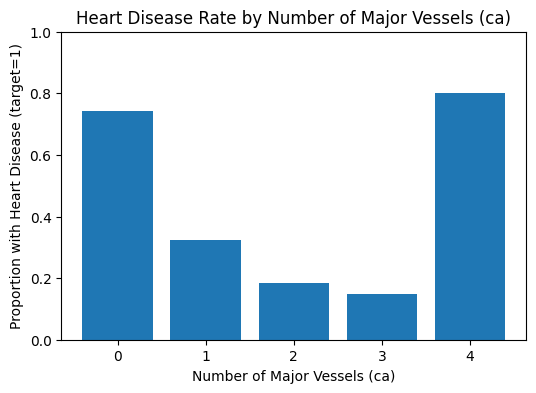

In [ ]:
rate_by_ca = df.groupby('number of major vessels')['target'].mean().sort_index()

plt.figure(figsize=(6,4))
plt.bar(rate_by_ca.index.astype(str), rate_by_ca.values)
plt.title('Heart Disease Rate by Number of Major Vessels (ca)')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Proportion with Heart Disease (target=1)')
plt.ylim(0, 1)
plt.show()

In [ ]:

X = df.drop('target', axis=1)
y = df['target']

# Step 1: Train
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# Step 2: Validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (181, 14)
Validation: (61, 14)
Test: (61, 14)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_val_pred_lr = lr.predict(X_val_scaled)

print("Logistic Regression – Validation Accuracy:",
      accuracy_score(y_val, y_val_pred_lr))
print(classification_report(y_val, y_val_pred_lr))

Logistic Regression – Validation Accuracy: 0.9672131147540983
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [ ]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

y_val_pred_svc = svc.predict(X_val_scaled)

print("SVC – Validation Accuracy:",
      accuracy_score(y_val, y_val_pred_svc))
print(classification_report(y_val, y_val_pred_svc))

SVC – Validation Accuracy: 0.9344262295081968
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        33

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

